 <img src="https://minas.medellin.unal.edu.co/eventos/latwaves2018/images/logo_unal.png" alt="unal logo" width="500"/>

#Universidad Nacional de Colombia
##Minería de Datos

## Prof. Elizabeth León

###$\color{blue}{\textit{DESCRIPCIÓN DE LOS DATOS}}$
  

  Presentado por:
####$\textit{Joan Gabriel Bofill Barrera}$
####$\textit{Ricardo René Duplat Durán}$

1. Análisis exploratorio


In [ ]:
# Import libraries
from google.colab import drive
import os
import pandas as pd

In [ ]:
# Mount google drive 
drive.mount('/content/gdrive/', force_remount=True)

# Set work directory 
%cd /content/gdrive/MyDrive/mineriaDatos/procesamiento/src
# # Defining input and output paths
inPath  = os.path.join('..', 'input')
outPath = os.path.join('..', 'output')
file = os.path.join(inPath, 'Saber_11__2019-2.csv')
# df = pd.read_csv(file)

Mounted at /content/gdrive/
/content/gdrive/.shortcut-targets-by-id/1UXeuSi9Al7gMs9cDsJpji-GZAgS9JdYU/mineriaDatos/procesamiento/src


In [ ]:
%load_ext rpy2.ipython

In [ ]:
# cargar librerias de R
%%R
library(data.table)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’



    between, first, last



    filter, lag



    intersect, setdiff, setequal, union




In [ ]:
# leer base de datos con R
%%R
saber11 <- fread("../input/Saber_11__2019-2.csv")

In [ ]:
# definiendo columnas a eliminar para el analisis descriptivo
%%R
borrar<- c("PERIODO", "ESTU_COD_RESIDE_DEPTO", "ESTU_COD_RESIDE_MCPIO", "COLE_CODIGO_ICFES", "COLE_COD_DANE_ESTABLECIMIENTO",
           "COLE_COD_DANE_SEDE", "COLE_COD_MCPIO_UBICACION", "COLE_COD_DEPTO_UBICACION", "ESTU_COD_MCPIO_PRESENTACION",
           "ESTU_DEPTO_PRESENTACION", "ESTU_COD_DEPTO_PRESENTACION")

In [ ]:
#borrando columnas
%%R
saber11 <- as.data.frame(saber11)[,! names(saber11) %in% borrar ]
saber11 <- as.data.table(saber11 ) 

In [ ]:
%%R
columNominal <- c("ESTU_TIPODOCUMENTO", "ESTU_NACIONALIDAD", "ESTU_GENERO", 
                  "ESTU_ESTUDIANTE", "ESTU_TIENEETNIA", "ESTU_PAIS_RESIDE",
                  "ESTU_ETNIA", "ESTU_DEPTO_RESIDE",  "ESTU_MCPIO_RESIDE",  "FAMI_ESTRATOVIVIENDA",
                  "FAMI_PERSONASHOGAR", "FAMI_CUARTOSHOGAR", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE",
                  "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_TIENEINTERNET",
                  "FAMI_TIENESERVICIOTV", "FAMI_TIENECOMPUTADOR", "FAMI_TIENELAVADORA",
                  "FAMI_TIENEHORNOMICROOGAS", "FAMI_TIENEAUTOMOVIL", "FAMI_TIENEMOTOCICLETA",
                  "FAMI_TIENECONSOLAVIDEOJUEGOS", "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS",
                  "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE",
                  "FAMI_SITUACIONECONOMICA", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET",
                  "ESTU_HORASSEMANATRABAJA", "ESTU_TIPOREMUNERACION", "COLE_NOMBRE_ESTABLECIMIENTO",
                  "COLE_GENERO", "COLE_NATURALEZA", "COLE_CALENDARIO", "COLE_BILINGUE",
                  "COLE_CARACTER", "COLE_NOMBRE_SEDE", "COLE_SEDE_PRINCIPAL", "COLE_AREA_UBICACION",
                  "COLE_JORNADA", "COLE_MCPIO_UBICACION", "COLE_DEPTO_UBICACION",
                  "ESTU_PRIVADO_LIBERTAD", "ESTU_MCPIO_PRESENTACION",
                  "ESTU_ESTADOINVESTIGACION", "ESTU_GENERACION-E")
columnNumer <- names(saber11)[! names(saber11) %in% columNominal]

In [ ]:
%%R
columnOrdin <- grep("(DESEMP)(.*)", columnNumer, value=T)
columnOrdin <- c(columnOrdin , "ESTU_NSE_INDIVIDUAL", "ESTU_NSE_ESTABLECIMIENTO")
columnNumer <- setdiff(columnNumer, columnOrdin)
identifica  <- "ESTU_CONSECUTIVO"
columnNumer <- setdiff(columnNumer, identifica)

Se definieron las vairables en 3 subconjuntos: columNominal son las columnas nominales, columnOrdin las ordinales y columnNumer las numericas. 
Para el caso de las nominales que tengan menos de 50 categorias posibles vamos a realizar tablas de frecuencia:

In [ ]:
%%R
for(ii in columNominal){
    aux <- length(  table( c(saber11[, ..ii]) ) ) 
    if(aux <50){
        print( table( c(saber11[, ..ii]) , useNA= "if") )
    }
}

Variables continuas hacemos algunos graficos:

In [ ]:
%%R
columnNumer

 [1] "ESTU_FECHANACIMIENTO"          "PUNT_LECTURA_CRITICA"         
 [3] "PERCENTIL_LECTURA_CRITICA"     "PUNT_MATEMATICAS"             
 [5] "PERCENTIL_MATEMATICAS"         "PUNT_C_NATURALES"             
 [7] "PERCENTIL_C_NATURALES"         "PUNT_SOCIALES_CIUDADANAS"     
 [9] "PERCENTIL_SOCIALES_CIUDADANAS" "PUNT_INGLES"                  
[11] "PERCENTIL_INGLES"              "PUNT_GLOBAL"                  
[13] "PERCENTIL_GLOBAL"              "ESTU_INSE_INDIVIDUAL"         


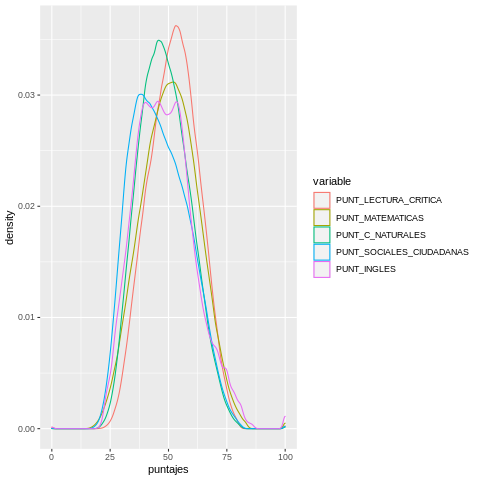

In [ ]:
%%R
puntajes <- grep("PUNT" ,names(saber11), value=T)[-6]
#puntajes
#saber11[,..puntajes]
puntajeBD <- melt(saber11[,..puntajes], value.name = "puntajes"  )
p <- ggplot(puntajeBD, aes(x= puntajes, colour = variable )) + geom_density()
p

In [ ]:
%%R
puntajes <- grep("PUNT" ,names(saber11), value=T)
cor(saber11[,..puntajes], use = "complete.obs")


                         PUNT_LECTURA_CRITICA PUNT_MATEMATICAS PUNT_C_NATURALES
PUNT_LECTURA_CRITICA                1.0000000        0.7356025        0.7478960
PUNT_MATEMATICAS                    0.7356025        1.0000000        0.8010214
PUNT_C_NATURALES                    0.7478960        0.8010214        1.0000000
PUNT_SOCIALES_CIUDADANAS            0.7974194        0.7266382        0.7764949
PUNT_INGLES                         0.6971531        0.6867510        0.7196135
PUNT_GLOBAL                         0.8984666        0.8996940        0.9137663
                         PUNT_SOCIALES_CIUDADANAS PUNT_INGLES PUNT_GLOBAL
PUNT_LECTURA_CRITICA                    0.7974194   0.6971531   0.8984666
PUNT_MATEMATICAS                        0.7266382   0.6867510   0.8996940
PUNT_C_NATURALES                        0.7764949   0.7196135   0.9137663
PUNT_SOCIALES_CIUDADANAS                1.0000000   0.6983737   0.9103668
PUNT_INGLES                             0.6983737   1.0000000   0.8082

In [ ]:
%%R
percentil <- grep("PERCENTI" ,names(saber11), value=T)
summary(saber11[,..percentil])
saber11[PERCENTIL_GLOBAL!="-", ..percentil][, 
          PERCENTIL_GLOBAL:= as.numeric(PERCENTIL_GLOBAL)] %>% summary()


 PERCENTIL_LECTURA_CRITICA PERCENTIL_MATEMATICAS PERCENTIL_C_NATURALES
 Min.   :  1.00            Min.   :  1.00        Min.   :  1.00       
 1st Qu.: 25.00            1st Qu.: 25.00        1st Qu.: 25.00       
 Median : 50.00            Median : 50.00        Median : 50.00       
 Mean   : 50.11            Mean   : 50.11        Mean   : 50.16       
 3rd Qu.: 75.00            3rd Qu.: 75.00        3rd Qu.: 75.00       
 Max.   :100.00            Max.   :100.00        Max.   :100.00       
 PERCENTIL_SOCIALES_CIUDADANAS PERCENTIL_INGLES PERCENTIL_GLOBAL
 Min.   :  1.00                Min.   :  1.0    Min.   :  1.00  
 1st Qu.: 25.00                1st Qu.: 25.0    1st Qu.: 25.00  
 Median : 50.00                Median : 50.0    Median : 50.00  
 Mean   : 50.18                Mean   : 50.1    Mean   : 49.99  
 3rd Qu.: 75.00                3rd Qu.: 75.0    3rd Qu.: 75.00  
 Max.   :100.00                Max.   :100.0    Max.   :100.00  


In [ ]:
%%R
#quitar los 19 datos sin percentil global
saber11New <- saber11[PERCENTIL_GLOBAL!="-"]
#funcion para pasar de percentil a quintil


# 1. Descripción de la base por variables

In [1]:
%load_ext rpy2.ipython

In [ ]:
# cargar librerias de R
%%R
library(data.table)
library(ggplot2)
library(dplyr)
library( lubridate )

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%%R
setwd("/content/drive/MyDrive/mineriaDatos/procesamiento/src")
saber11 <- fread("../input/Saber_11__2019-2_NEW.csv")

|

|



In [4]:
%%R
#Variables a nivel de Estudiante
estuVar<- grep("ESTU",names(saber11), value=T)
str(saber11[, ..estuVar])


Classes ‘data.table’ and 'data.frame':	546212 obs. of  21 variables:
 $ ESTU_TIPODOCUMENTO          : chr  "TI" "TI" "TI" "TI" ...
 $ ESTU_NACIONALIDAD           : chr  "COLOMBIA" "COLOMBIA" "COLOMBIA" "COLOMBIA" ...
 $ ESTU_GENERO                 : chr  "M" "M" "M" "M" ...
 $ ESTU_FECHANACIMIENTO        : POSIXct, format: "2002-02-18 17:00:00" "2003-06-28 17:00:00" ...
 $ ESTU_CONSECUTIVO            : chr  "SB11201940031558" "SB11201940303339" "SB11201940255017" "SB11201940154799" ...
 $ ESTU_ESTUDIANTE             : chr  "ESTUDIANTE" "ESTUDIANTE" "ESTUDIANTE" "ESTUDIANTE" ...
 $ ESTU_TIENEETNIA             : chr  "No" "No" "No" "Si" ...
 $ ESTU_PAIS_RESIDE            : chr  "COLOMBIA" "COLOMBIA" "COLOMBIA" "COLOMBIA" ...
 $ ESTU_ETNIA                  : chr  "-" "-" "-" "Ninguno" ...
 $ ESTU_DEPTO_RESIDE           : chr  "MAGDALENA" "BOGOTÁ" "BOLIVAR" "BOGOTÁ" ...
 $ ESTU_MCPIO_RESIDE           : chr  "SANTA ANA" "BOGOTÁ D.C." "CARTAGENA DE INDIAS" "BOGOTÁ D.C." ...
 $ ESTU_DEDICACIO

En total son 21 variables de estudiante, 4 de ellas son postaplicacion: "ESTU_ESTADOINVESTIGACION", "ESTU_GENERACION-E", "ESTU_NSE_INDIVIDUAL", "ESTU_INSE_INDIVIDUAL" y una es de identificacion ESTU_CONSECUTIVO. 
L aunica variable que no es caracter es ESTU_FECHANACIMIENTO. Como el examen se aplicó el 25 de agosto de 2019, se puede calcular la variable edad realizando la resta: 

In [5]:
%%R
fechaApli <- as.Date(c("2019/08/25"), format= "%Y/%m/%d")
saber11[, Edad := time_length(difftime(fechaApli, ESTU_FECHANACIMIENTO), "years") ]
summary(saber11$Edad)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -0.106   16.724   17.268   18.354   18.216 2018.232 


Con este resumen se puede observar que hay error en algunos datos con respecto a la edad. Por el momento se va a asumir que cualquier valor mayor a 100 años es un dato faltante (NA)

In [6]:
%%R
saber11[  Edad > 100, Edad:= NA ]
summary(saber11$Edad)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -0.106  16.721  17.266  17.994  18.205  83.492    1856 


Por otro lado, las variables ESTU_INSE_INDIVIDUAL y ESTU_NSE_INDIVIDUAL se construye en base a las preguntas socioeconomicas de la encuesta, la cual consiste en muchas de las variables disponibles en la base de datos. Por tal razon no la utilizaremos en el proyecto. Por el contrario, la variable ESTU_NSE_ESTABLECIMIENTO es una categorización de los indices agregados a nivel de estudiante. Este nivel no cambia demasiado aplicación entre aplicaciónes, por lo tanto no la eliminaremos. 

In [ ]:
%%R
saber11[, ESTU_INSE_INDIVIDUAL := NULL ]
saber11[, ESTU_NSE_INDIVIDUAL := NULL ]

In [16]:
%%R
excVarsEst <- c("ESTU_FECHANACIMIENTO", "ESTU_CONSECUTIVO", "ESTU_MCPIO_RESIDE")
estuVar<- grep("ESTU",names(saber11), value=T)
#saber11[, ..estuVar]
apply(select(saber11[, ..estuVar], -one_of(excVarsEst)), 2, FUN=unique )


$ESTU_TIPODOCUMENTO
 [1] "TI"  "CC"  "PEP" "CE"  "NES" "PE"  "CR"  "CCB" "PC"  "RC" 

$ESTU_NACIONALIDAD
 [1] "COLOMBIA"               "VENEZUELA"              "ESPAÑA"                
 [4] "ECUADOR"                "CROACIA"                "PERÚ"                  
 [7] "ITALIA"                 "ESTADOS UNIDOS"         "FRANCIA"               
[10] "EL SALVADOR"            "COSTA RICA"             "ARGENTINA"             
[13] "ALBANIA"                "TAIWAN"                 "CUBA"                  
[16] "CHILE"                  "MÉXICO"                 "ALEMANIA"              
[19] "ARUBA"                  "BRASIL"                 "REINO UNIDO"           
[22] "DINAMARCA"              "PAÍSES BAJOS - HOLANDA" "COMORAS"               
[25] "REPÚBLICA DOMINICANA"   "BOLIVIA"                "CHINA"                 
[28] "BÉLGICA"                "PANAMÁ"                 "AFGANISTÁN"            
[31] "COREA DEL NORTE"        "CURAZAO"                "VANUATU"               

$ESTU_GENERO
[

In [17]:
%%R
estuVar<- c(estuVar, "Edad")

Variables a nivel de Colegio

In [15]:
%%R
#Variables a nivel de Colegio
coleVar<-grep("COLE",names(saber11), value=T)
str(saber11[, ..coleVar])

Classes ‘data.table’ and 'data.frame':	546212 obs. of  12 variables:
 $ COLE_CODIGO_ICFES   : int  39008 128611 35493 138032 217406 706101 16659 709261 9233 179630 ...
 $ COLE_GENERO         : chr  "MIXTO" "MIXTO" "MIXTO" "MIXTO" ...
 $ COLE_NATURALEZA     : chr  "OFICIAL" "NO OFICIAL" "OFICIAL" "OFICIAL" ...
 $ COLE_CALENDARIO     : chr  "A" "A" "A" "A" ...
 $ COLE_BILINGUE       : chr  "N" "-" "N" "-" ...
 $ COLE_CARACTER       : chr  "TÉCNICO/ACADÉMICO" "ACADÉMICO" "TÉCNICO/ACADÉMICO" "ACADÉMICO" ...
 $ COLE_COD_DANE_SEDE  :integer64 147707000156 311001105383 113001001719 111001107069 111001094897 308758800002 376001000608 168001001131 ... 
 $ COLE_SEDE_PRINCIPAL : chr  "S" "S" "S" "S" ...
 $ COLE_AREA_UBICACION : chr  "URBANO" "URBANO" "URBANO" "URBANO" ...
 $ COLE_JORNADA        : chr  "MAÑANA" "COMPLETA" "MAÑANA" "MAÑANA" ...
 $ COLE_MCPIO_UBICACION: chr  "SANTA ANA" "BOGOTÁ D.C." "CARTAGENA DE INDIAS" "BOGOTÁ D.C." ...
 $ COLE_DEPTO_UBICACION: chr  "MAGDALENA" "BOGOTÁ" "BOLIVAR"

13 VARIABES, 2 son de identificacion: COLE_CODIGO_ICFES, COLE_COD_DANE_SEDE

In [ ]:
%%R
excVarscol <- c("COLE_COD_DANE_SEDE", "COLE_CODIGO_ICFES", "COLE_MCPIO_UBICACION")
apply(select(saber11[, ..coleVar], -one_of(excVarscol)), 2, FUN=unique )


$ESTU_TIPODOCUMENTO
 [1] "TI"  "CC"  "PEP" "CE"  "NES" "PE"  "CR"  "CCB" "PC"  "RC" 

$ESTU_NACIONALIDAD
 [1] "COLOMBIA"               "VENEZUELA"              "ESPAÑA"                
 [4] "ECUADOR"                "CROACIA"                "PERÚ"                  
 [7] "ITALIA"                 "ESTADOS UNIDOS"         "FRANCIA"               
[10] "EL SALVADOR"            "COSTA RICA"             "ARGENTINA"             
[13] "ALBANIA"                "TAIWAN"                 "CUBA"                  
[16] "CHILE"                  "MÉXICO"                 "ALEMANIA"              
[19] "ARUBA"                  "BRASIL"                 "REINO UNIDO"           
[22] "DINAMARCA"              "PAÍSES BAJOS - HOLANDA" "COMORAS"               
[25] "REPÚBLICA DOMINICANA"   "BOLIVIA"                "CHINA"                 
[28] "BÉLGICA"                "PANAMÁ"                 "AFGANISTÁN"            
[31] "COREA DEL NORTE"        "CURAZAO"                "VANUATU"               

$ESTU_GENERO
[